### 시각화 - matplotlib,ggplot,seaborn 라이브러리

In [2]:
import matplotlib.pyplot as plt

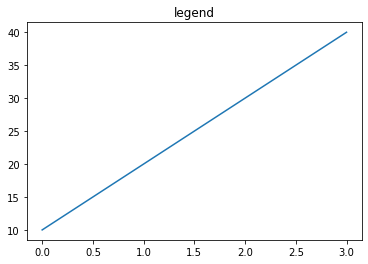

In [5]:
plt.title("legend")
plt.plot([10,20,30,40]) # y축에 생성됨
plt.show()

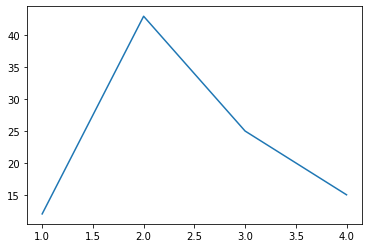

In [4]:
plt.plot([1,2,3,4],[12,43,25,15]) # 플로트형태로 변환해줌
plt.show()

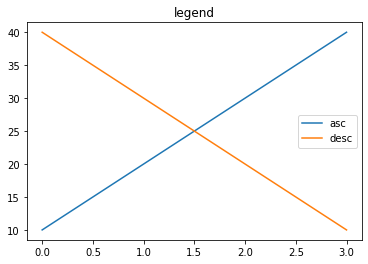

In [6]:
plt.title("legend")
plt.plot([10,20,30,40],label="asc") 
plt.plot([40,30,20,10],label="desc") 
plt.legend() # 범례 
plt.show()

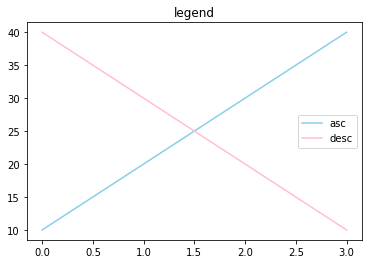

In [7]:
plt.title("legend")
plt.plot([10,20,30,40],label="asc",color="skyblue") 
plt.plot([40,30,20,10],label="desc",color="pink") 
plt.legend() # 범례 
plt.show()

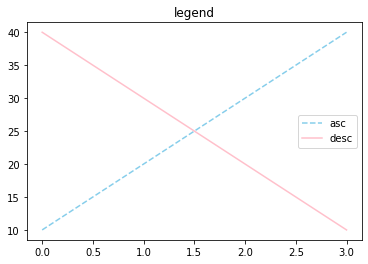

In [8]:
plt.title("legend")
plt.plot([10,20,30,40],label="asc",color="skyblue",linestyle="--") 
plt.plot([40,30,20,10],label="desc",color="pink") 
plt.legend() # 범례 
plt.show()

In [9]:
import pandas as pd

In [11]:
temp_df=pd.read_csv("./ta.csv",encoding="ms949")
temp_df

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4
...,...,...,...,...,...
40836,2020-09-24,108,20.6,16.8,25.4
40837,2020-09-25,108,20.1,16.6,25.4
40838,2020-09-26,108,19.3,14.8,24.8
40839,2020-09-27,108,20.4,14.9,25.8


In [12]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       40841 non-null  object 
 1   지점       40841 non-null  int64  
 2   평균기온(℃)  40085 non-null  float64
 3   최저기온(℃)  40084 non-null  float64
 4   최고기온(℃)  40083 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [14]:
temp_max = pd.DataFrame(temp_df["최고기온(℃)"])
temp_max

,최고기온(℃)
0,20.7
1,22.0
2,21.3
3,22.0
4,25.4
...,...
40836,25.4
40837,25.4
40838,24.8
40839,25.8


In [18]:
# isnull 제거 inplace = True : 테이블에 바로 반영

temp_max.dropna(inplace=True)

In [19]:
temp_max.head(5)

,최고기온(℃)
0,20.7
1,22.0
2,21.3
3,22.0
4,25.4


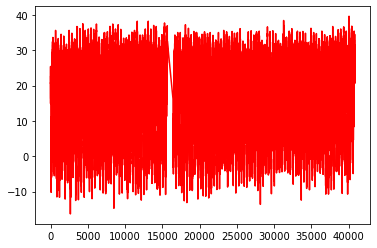

In [24]:
plt.plot(temp_max["최고기온(℃)"],"red")
plt.show()

In [ ]:
# 각 년도의 8월 데이터만 추출하여 시각화 


In [28]:
temp_month = temp_df[["날짜","최고기온(℃)"]].copy()
temp_month

,날짜,최고기온(℃)
0,1907-10-01,20.7
1,1907-10-02,22.0
2,1907-10-03,21.3
3,1907-10-04,22.0
4,1907-10-05,25.4
...,...,...
40836,2020-09-24,25.4
40837,2020-09-25,25.4
40838,2020-09-26,24.8
40839,2020-09-27,25.8


In [26]:
# 월만 추출하기
def get_month(date):
    return date.split("-")[1] # ['2000','01','01']

In [29]:
temp_month["월"] = temp_month["날짜"].apply(get_month)
temp_month

,날짜,최고기온(℃),월
0,1907-10-01,20.7,10
1,1907-10-02,22.0,10
2,1907-10-03,21.3,10
3,1907-10-04,22.0,10
4,1907-10-05,25.4,10
...,...,...,...
40836,2020-09-24,25.4,09
40837,2020-09-25,25.4,09
40838,2020-09-26,24.8,09
40839,2020-09-27,25.8,09


In [30]:
temp_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       40841 non-null  object 
 1   최고기온(℃)  40083 non-null  float64
 2   월        40841 non-null  object 
dtypes: float64(1), object(2)
memory usage: 957.3+ KB


In [31]:
# null 데이터 제거

temp_month.dropna(inplace=True)

In [32]:
# 8월 데이터 

temp_8 = temp_month[temp_month["월"]=="08"]
temp_8

,날짜,최고기온(℃),월
305,1908-08-01,29.6,08
306,1908-08-02,30.7,08
307,1908-08-03,32.0,08
308,1908-08-04,31.5,08
309,1908-08-05,32.4,08
...,...,...,...
40808,2020-08-27,28.6,08
40809,2020-08-28,29.7,08
40810,2020-08-29,29.0,08
40811,2020-08-30,30.6,08


In [34]:
temp_8.reset_index(inplace=True)
temp_8

,index,날짜,최고기온(℃),월
0,305,1908-08-01,29.6,08
1,306,1908-08-02,30.7,08
2,307,1908-08-03,32.0,08
3,308,1908-08-04,31.5,08
4,309,1908-08-05,32.4,08
...,...,...,...,...
3405,40808,2020-08-27,28.6,08
3406,40809,2020-08-28,29.7,08
3407,40810,2020-08-29,29.0,08
3408,40811,2020-08-30,30.6,08


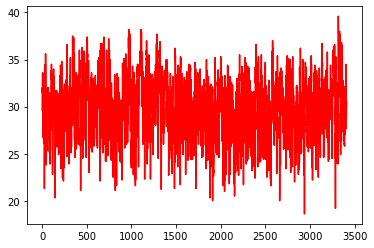

In [35]:
plt.plot(temp_8["최고기온(℃)"],"red")
plt.show()

In [36]:
# 각 년도의 오늘 날짜의 최고온도를 시각화 


temp_month

,날짜,최고기온(℃),월
0,1907-10-01,20.7,10
1,1907-10-02,22.0,10
2,1907-10-03,21.3,10
3,1907-10-04,22.0,10
4,1907-10-05,25.4,10
...,...,...,...
40836,2020-09-24,25.4,09
40837,2020-09-25,25.4,09
40838,2020-09-26,24.8,09
40839,2020-09-27,25.8,09


In [37]:
# 월만 추출하기
def get_day(date):
    return date.split("-")[2] # ['2000','01','01']

In [38]:
temp_month["일"] = temp_month["날짜"].apply(get_day)
temp_month

,날짜,최고기온(℃),월,일
0,1907-10-01,20.7,10,01
1,1907-10-02,22.0,10,02
2,1907-10-03,21.3,10,03
3,1907-10-04,22.0,10,04
4,1907-10-05,25.4,10,05
...,...,...,...,...
40836,2020-09-24,25.4,09,24
40837,2020-09-25,25.4,09,25
40838,2020-09-26,24.8,09,26
40839,2020-09-27,25.8,09,27


In [40]:
temp_today = temp_month[(temp_month["월"]=="03") & (temp_month["일"]=="17")]
temp_today

,날짜,최고기온(℃),월,일
168,1908-03-17,15.7,03,17
533,1909-03-17,3.0,03,17
898,1910-03-17,8.6,03,17
1263,1911-03-17,11.4,03,17
1629,1912-03-17,4.3,03,17
...,...,...,...,...
39184,2016-03-17,14.7,03,17
39549,2017-03-17,15.7,03,17
39914,2018-03-17,14.0,03,17
40279,2019-03-17,12.4,03,17


In [42]:
temp_today.reset_index(inplace=True)
temp_today

,index,날짜,최고기온(℃),월,일
0,168,1908-03-17,15.7,03,17
1,533,1909-03-17,3.0,03,17
2,898,1910-03-17,8.6,03,17
3,1263,1911-03-17,11.4,03,17
4,1629,1912-03-17,4.3,03,17
...,...,...,...,...,...
105,39184,2016-03-17,14.7,03,17
106,39549,2017-03-17,15.7,03,17
107,39914,2018-03-17,14.0,03,17
108,40279,2019-03-17,12.4,03,17


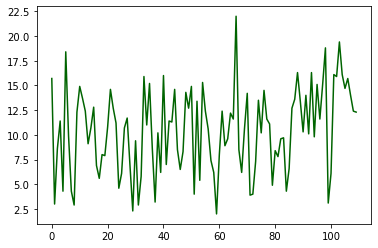

In [43]:
plt.plot(temp_today["최고기온(℃)"],"darkgreen")
plt.show()

In [47]:
# 1990년 3월 17일 이후의 최고 기온 시각화

#temp_3_17 = temp_month[(temp_month["날짜"]=="03") & (temp_month["일"]=="17")]
#temp_3_17
temp_3_17 = temp_month[(int(temp_month["날짜"]))>=int("1990-03-17")]

TypeError: cannot convert the series to <class 'int'>

In [49]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       40841 non-null  object 
 1   지점       40841 non-null  int64  
 2   평균기온(℃)  40085 non-null  float64
 3   최저기온(℃)  40084 non-null  float64
 4   최고기온(℃)  40083 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [50]:
temp_high = temp_df[["날짜","최고기온(℃)"]].copy()
temp_high

,날짜,최고기온(℃)
0,1907-10-01,20.7
1,1907-10-02,22.0
2,1907-10-03,21.3
3,1907-10-04,22.0
4,1907-10-05,25.4
...,...,...
40836,2020-09-24,25.4
40837,2020-09-25,25.4
40838,2020-09-26,24.8
40839,2020-09-27,25.8


In [51]:
temp_high.dropna(inplace=True)

In [53]:
temp_high["년도2"] = pd.to_datetime(temp_high["날짜"])
temp_high.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40083 entries, 0 to 40840
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       40083 non-null  object        
 1   최고기온(℃)  40083 non-null  float64       
 2   년도2      40083 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.2+ MB


In [54]:
temp_high["년도"]= temp_high["년도2"].dt.year
temp_high["월"]= temp_high["년도2"].dt.month
temp_high["일"]= temp_high["년도2"].dt.day
temp_high

,날짜,최고기온(℃),년도2,년도,월,일
0,1907-10-01,20.7,1907-10-01,1907,10,1
1,1907-10-02,22.0,1907-10-02,1907,10,2
2,1907-10-03,21.3,1907-10-03,1907,10,3
3,1907-10-04,22.0,1907-10-04,1907,10,4
4,1907-10-05,25.4,1907-10-05,1907,10,5
...,...,...,...,...,...,...
40836,2020-09-24,25.4,2020-09-24,2020,9,24
40837,2020-09-25,25.4,2020-09-25,2020,9,25
40838,2020-09-26,24.8,2020-09-26,2020,9,26
40839,2020-09-27,25.8,2020-09-27,2020,9,27


In [55]:
temp_high.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40083 entries, 0 to 40840
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       40083 non-null  object        
 1   최고기온(℃)  40083 non-null  float64       
 2   년도2      40083 non-null  datetime64[ns]
 3   년도       40083 non-null  int64         
 4   월        40083 non-null  int64         
 5   일        40083 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 2.1+ MB


In [56]:
temp_today = temp_high[(temp_high["년도"] >=1990) & (temp_high["월"] ==3) & (temp_high["일"] ==17)]
temp_today

,날짜,최고기온(℃),년도2,년도,월,일
29687,1990-03-17,4.9,1990-03-17,1990,3,17
30052,1991-03-17,8.4,1991-03-17,1991,3,17
30418,1992-03-17,7.8,1992-03-17,1992,3,17
30783,1993-03-17,9.6,1993-03-17,1993,3,17
31148,1994-03-17,9.7,1994-03-17,1994,3,17
31513,1995-03-17,4.3,1995-03-17,1995,3,17
31879,1996-03-17,6.6,1996-03-17,1996,3,17
32244,1997-03-17,12.7,1997-03-17,1997,3,17
32609,1998-03-17,13.6,1998-03-17,1998,3,17
32974,1999-03-17,16.3,1999-03-17,1999,3,17


In [58]:
temp_today.reset_index(inplace=True)
temp_today

,index,날짜,최고기온(℃),년도2,년도,월,일
0,29687,1990-03-17,4.9,1990-03-17,1990,3,17
1,30052,1991-03-17,8.4,1991-03-17,1991,3,17
2,30418,1992-03-17,7.8,1992-03-17,1992,3,17
3,30783,1993-03-17,9.6,1993-03-17,1993,3,17
4,31148,1994-03-17,9.7,1994-03-17,1994,3,17
5,31513,1995-03-17,4.3,1995-03-17,1995,3,17
6,31879,1996-03-17,6.6,1996-03-17,1996,3,17
7,32244,1997-03-17,12.7,1997-03-17,1997,3,17
8,32609,1998-03-17,13.6,1998-03-17,1998,3,17
9,32974,1999-03-17,16.3,1999-03-17,1999,3,17


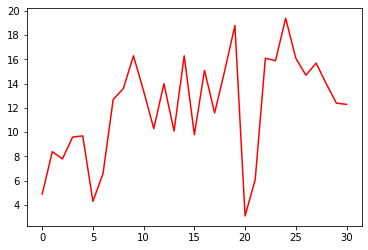

In [59]:
plt.plot(temp_today["최고기온(℃)"],"red")
plt.show()